In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyedhrec import EDHRec


import sys
sys.path.append('../')

from utils import edhrec_requests as edh
from utils import funciones
from utils import graficos

In [2]:
#Cargamos un folder con mazos diferentes para el análisis
df = edh.load_deck_from_file("../data/mazos/personales/dinoprehis.txt")

df

,Deck Name,Card Name
0,"1x Wayta, Trainer Prodigy",Akroma's Will
1,"1x Wayta, Trainer Prodigy",Apex Altisaur
2,"1x Wayta, Trainer Prodigy",Arcane Signet
3,"1x Wayta, Trainer Prodigy",Arid Mesa
4,"1x Wayta, Trainer Prodigy",Atzocan Seer
...,...,...
89,"1x Wayta, Trainer Prodigy",Welcome to . . . // Jurassic Park
90,"1x Wayta, Trainer Prodigy",Windswept Heath
91,"1x Wayta, Trainer Prodigy",Wooded Foothills
92,"1x Wayta, Trainer Prodigy",Wrathful Raptors


In [3]:
#Cargamos la base de datos de cartas
df_bd = pd.read_csv("../data/cartas_limpiadas.csv")
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28369 entries, 0 to 28368
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          28369 non-null  object 
 1   type_line     28369 non-null  object 
 2   set           28369 non-null  object 
 3   set_name      28369 non-null  object 
 4   released_at   28369 non-null  object 
 5   rarity        28369 non-null  object 
 6   reprint       28369 non-null  bool   
 7   edhrec_rank   28369 non-null  float64
 8   legalities    28369 non-null  object 
 9   cmc           28369 non-null  float64
 10  eur           25197 non-null  float64
 11  release_year  28369 non-null  int64  
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 2.4+ MB


In [4]:
#Vamos a añadirle la información relevante
df_dinos = edh.añadir_columnas_relevantes(df_bd, df)
df_dinos.info()
df_dinos.head()

e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:120: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Instant' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "type_line"] = match.iloc[0]["type_line"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:121: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cmr' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "set"] = match.iloc[0]["set"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2020-11-20' has dtype incompatibl

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Deck Name     91 non-null     object
 1   Card Name     91 non-null     object
 2   type_line     91 non-null     object
 3   set           91 non-null     object
 4   released_at   91 non-null     object
 5   release_year  91 non-null     Int64 
 6   edhrec_rank   91 non-null     Int64 
dtypes: Int64(2), object(5)
memory usage: 7.9+ KB


,Deck Name,Card Name,type_line,set,released_at,release_year,edhrec_rank
0,"1x Wayta, Trainer Prodigy",Akroma's Will,Instant,cmr,2020-11-20,2020,244
1,"1x Wayta, Trainer Prodigy",Apex Altisaur,Creature — Dinosaur,c19,2019-08-23,2019,1294
2,"1x Wayta, Trainer Prodigy",Arcane Signet,Artifact,eld,2019-10-04,2019,3
3,"1x Wayta, Trainer Prodigy",Arid Mesa,Land,zen,2009-10-02,2009,55
4,"1x Wayta, Trainer Prodigy",Atzocan Seer,Creature — Human Druid,rix,2018-01-19,2018,3610


e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\graficos.py:44: UserWarning: The palette list has more values (54) than needed (51), which may not be intended.
  sns.barplot(data=df_yearly_sets, x="release_year", y="count", hue="set_label", dodge=False, palette=flat_colors_distintos)


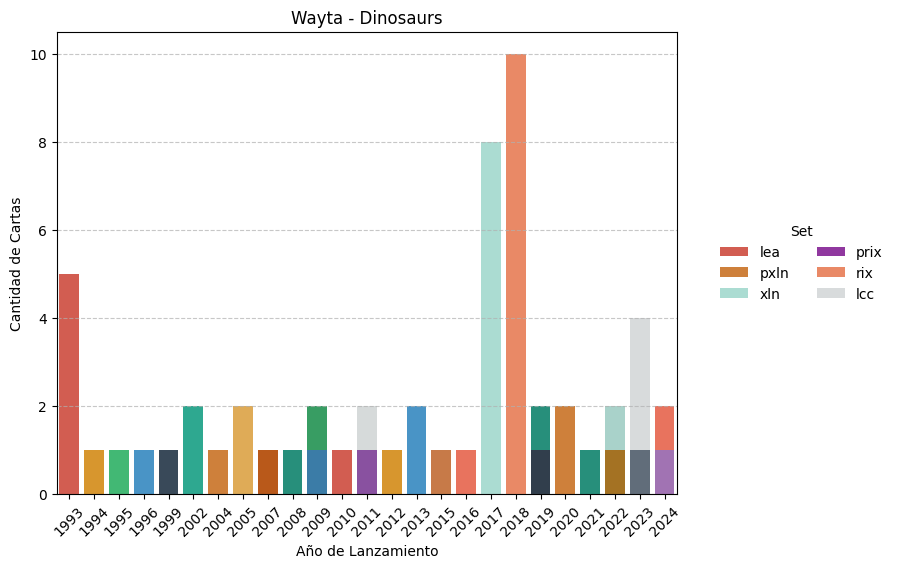

In [11]:
graficos.dibujar_grafico_uno(df_dinos, "Wayta - Dinosaurs")

In [6]:
#Ahora miramos marina vendrel
#Cargamos un folder con mazos diferentes para el análisis
df = edh.load_deck_from_file("../data/mazos/personales/marinaVendrel.txt")
df

,Deck Name,Card Name
0,1 Marina Vendrell,Arcane Signet
1,1 Marina Vendrell,Arid Mesa
2,1 Marina Vendrell,"Bello, Bard of the Brambles"
3,1 Marina Vendrell,Blood Crypt
4,1 Marina Vendrell,"Boseiju, Who Endures"
...,...,...
97,1 Marina Vendrell,Walk-In Closet // Forgotten Cellar
98,1 Marina Vendrell,Windswept Heath
99,1 Marina Vendrell,Wooded Foothills
100,1 Marina Vendrell,Zagoth Triome


In [7]:
#Vamos a añadirle la información relevante
df_marina = edh.añadir_columnas_relevantes(df_bd, df)
df_marina.info()
df_marina.head()

e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:120: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Artifact' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "type_line"] = match.iloc[0]["type_line"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:121: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'eld' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "set"] = match.iloc[0]["set"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\edhrec_requests.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2019-10-04' has dtype incompatib

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 101
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Deck Name     97 non-null     object
 1   Card Name     97 non-null     object
 2   type_line     97 non-null     object
 3   set           97 non-null     object
 4   released_at   97 non-null     object
 5   release_year  97 non-null     Int64 
 6   edhrec_rank   97 non-null     Int64 
dtypes: Int64(2), object(5)
memory usage: 8.3+ KB


,Deck Name,Card Name,type_line,set,released_at,release_year,edhrec_rank
0,1 Marina Vendrell,Arcane Signet,Artifact,eld,2019-10-04,2019,3
1,1 Marina Vendrell,Arid Mesa,Land,zen,2009-10-02,2009,55
2,1 Marina Vendrell,"Bello, Bard of the Brambles",Legendary Creature — Raccoon Bard,blc,2024-08-02,2024,4896
3,1 Marina Vendrell,Blood Crypt,Land — Swamp Mountain,dis,2006-05-05,2006,84
4,1 Marina Vendrell,"Boseiju, Who Endures",Legendary Land,neo,2022-02-18,2022,80


e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\graficos.py:44: UserWarning: The palette list has more values (54) than needed (39), which may not be intended.
  sns.barplot(data=df_yearly_sets, x="release_year", y="count", hue="set_label", dodge=False, palette=flat_colors_distintos)


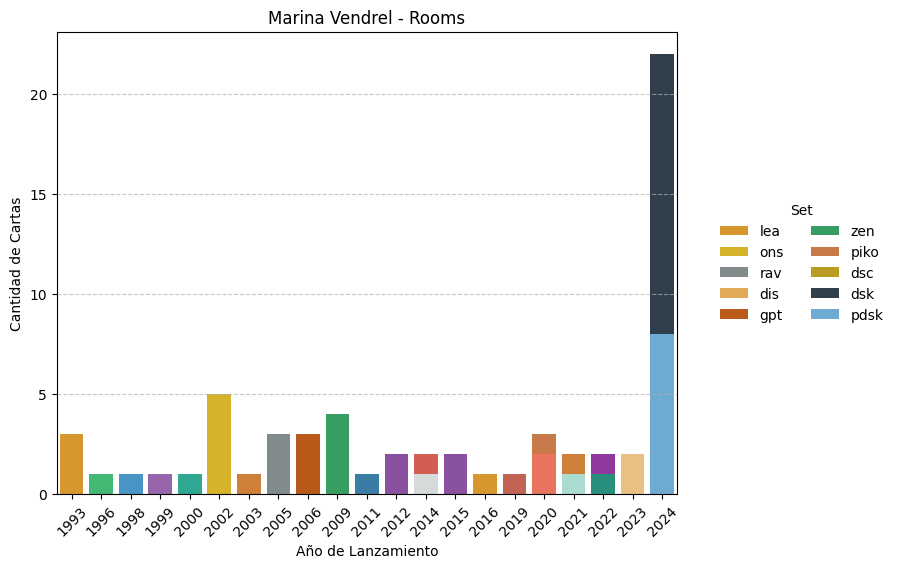

In [14]:
graficos.dibujar_grafico_uno(df_marina, "Marina Vendrel - Rooms")

e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\graficos.py:116: UserWarning: The palette list has more values (54) than needed (51), which may not be intended.
  sns.barplot(data=df_combined, x='release_year', y='set_count', hue='set_label', ax=ax1, dodge=False, palette=flat_colors_distintos)


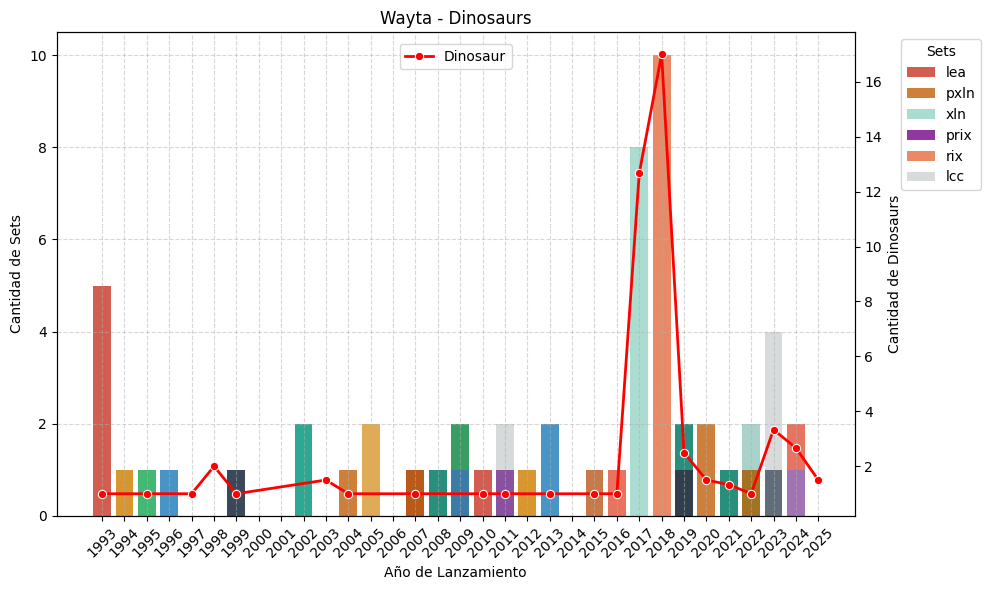

In [5]:
graficos.dibujar_grafico_dos(df_dinos, df_bd, "Dinosaur", "Wayta - Dinosaurs")

e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\notebooks\..\utils\graficos.py:116: UserWarning: The palette list has more values (54) than needed (39), which may not be intended.
  sns.barplot(data=df_combined, x='release_year', y='set_count', hue='set_label', ax=ax1, dodge=False, palette=flat_colors_distintos)


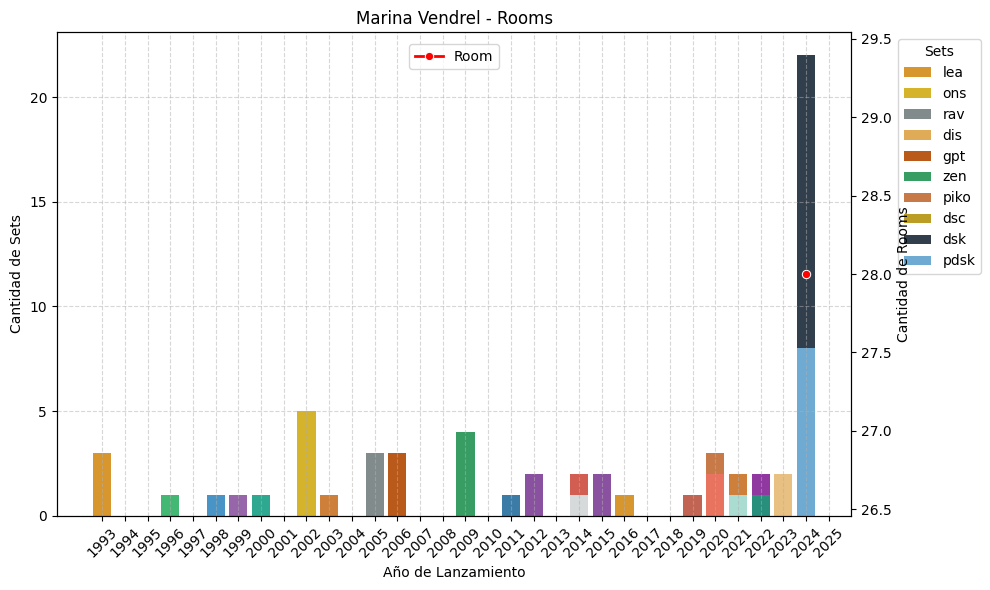

In [8]:
graficos.dibujar_grafico_dos(df_marina, df_bd, "Room", "Marina Vendrel - Rooms")